<a href="https://colab.research.google.com/github/yue-cheng-wind/Copy_of_mmocr_official/blob/main/Copy_of_mmocr_official.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun Jan 30 21:32:43 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# MMOCR Tutorial

Welcome to MMOCR! This is the official colab tutorial for using MMOCR. In this tutorial, you will learn how to

- Perform inference with a pretrained text recognizer
- Perform inference with a pretrained text detector
- Perform end-to-end OCR with pretrained recognizer and detector
- Combine OCR with downstream tasks
- Perform inference with a pretrained Key Information Extraction (KIE) model
- Train a text recognizer with a toy dataset

Let's start!

## Install MMOCR

When installing dependencies for mmocr, please ensure that all the dependency versions are compatible with each other. For instance, if CUDA 10.1 is installed, then the Pytorch version must be compatible with cu10.1. Please see [getting_started.md](docs/getting_started.md) for more details. 

In [2]:
%cd ..

/


### Check NVCC and GCC compiler version

In [3]:
!nvcc -V
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



### Install Dependencies 

In [4]:
# Install torch dependencies: (use cu110 since colab has CUDA 11)
!pip install -U torch==1.7.0+cu110 torchvision==0.8.0 -f https://download.pytorch.org/whl/torch_stable.html

# Install mmcv-full thus we could use CUDA operators
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu110/torch1.6.0/index.html

# Install mmdetection
!pip install mmdet

# Install mmocr
# !git clone https://github.com/open-mmlab/mmocr.git
!git clone https://github.com/yue-cheng-wind/mmocr.git
%cd mmocr
!pip install -r requirements.txt
!pip install -v -e .

Looking in links: https://download.pytorch.org/whl/torch_stable.html
Looking in links: https://download.openmmlab.com/mmcv/dist/cu110/torch1.6.0/index.html
  Using cached mmcv-full-1.4.4.tar.gz (420 kB)
  Using cached addict-2.4.0-py3-none-any.whl (3.8 kB)
  Using cached yapf-0.32.0-py2.py3-none-any.whl (190 kB)
  Created wheel for mmcv-full: filename=mmcv_full-1.4.4-cp37-cp37m-linux_x86_64.whl size=50156426 sha256=79c85d15128ae61755cd8d08dffd352cb8a1caed35ef99c3341ae4dd8e100865
  Stored in directory: /root/.cache/pip/wheels/95/8f/23/d7b471e373196d960c7eca09dad9c895b58213bcf6b743d0ed
Successfully built mmcv-full
fatal: destination path 'mmocr' already exists and is not an empty directory.
/mmocr
  Using cached pyclipper-1.3.0.post2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (603 kB)
  Using cached lanms_neo-1.0.2.tar.gz (39 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |█████████████████

In [46]:
!git pull
!ls demo/yue

remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 5 (delta 3), reused 5 (delta 3), pack-reused 0
Unpacking objects: 100% (5/5), done.
From https://github.com/yue-cheng-wind/mmocr
   07ad2ad..04b001b  main       -> origin/main
Updating 07ad2ad..04b001b
Fast-forward
 demo/yue/bend3.PNG | Bin 0 -> 28155 bytes
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 demo/yue/bend3.PNG
bend2.PNG  car-simple.jpg     fire-1-plate3.PNG  fire-1-plate6.PNG
bend3.PNG  fire-1.jpg	      fire-1-plate4.PNG  fire-1-plate.PNG
bend.PNG   fire-1-plate2.PNG  fire-1-plate5.PNG


In [6]:
# !pip uninstall mmcv-full
# !pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu110/torch1.6.0/index.html --no-cache-dir

Found existing installation: mmcv-full 1.4.4
Uninstalling mmcv-full-1.4.4:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/mmcv/*
    /usr/local/lib/python3.7/dist-packages/mmcv_full-1.4.4.dist-info/*
Proceed (y/n)? ERROR: Operation cancelled by user
Looking in links: https://download.openmmlab.com/mmcv/dist/cu110/torch1.6.0/index.html


### Check Installed Dependencies Versions

In [7]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
import mmcv
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(mmcv.__version__)
print(get_compiling_cuda_version())
print(get_compiler_version())

# Check mmocr installation
import mmocr
print(mmocr.__version__)

%cd /mmocr/
!ls

1.7.0+cu110 True
2.20.0
1.4.4
11.1
GCC 7.5
0.4.1
/mmocr
CITATION.cff  docs	   mmocr.egg-info   requirements      setup.py
configs       LICENSE	   model-index.yml  requirements.txt  tests
demo	      MANIFEST.in  README.md	    resources	      tools
docker	      mmocr	   README_zh-CN.md  setup.cfg


In [8]:
!ls

CITATION.cff  docs	   mmocr.egg-info   requirements      setup.py
configs       LICENSE	   model-index.yml  requirements.txt  tests
demo	      MANIFEST.in  README.md	    resources	      tools
docker	      mmocr	   README_zh-CN.md  setup.cfg


# Inference

We provide an easy-to-use inference script, `mmocr/utils/ocr.py`, that can be either called through command line or imported as an object (the `MMOCR` class inside). In this notebook, we choose the latter option for ease of demonstration. You can check out its full usage and examples in our [official documentation](https://mmocr.readthedocs.io/en/latest/demo.html).

## Perform Inference with a Pretrained Text Recognizer 

We now demonstrate how to inference on a [demo text recognition image](https://github.com/open-mmlab/mmocr/raw/main/demo/demo_text_recog.jpg) with a pretrained text recognizer using command line. SAR text recognizer is used for this demo, whose checkpoint can be found in the [official documentation](https://mmocr.readthedocs.io/en/latest/textrecog_models.html#show-attend-and-read-a-simple-and-strong-baseline-for-irregular-text-recognition). But you don't need to download it manually -- Our inference script handles these cumbersome setup steps for you! 

Run the following command and the recognition result will be saved to `outputs/demo_text_recog_pred.jpg`. We will visualize the result in the end.

In [47]:
from mmocr.utils.ocr import MMOCR
mmocr = MMOCR(det=None, recog='SAR')
mmocr.readtext('demo/yue/bend3.PNG', print_result=True, output='outputs/demo_text_recog_pred.jpg')

load checkpoint from http path: https://download.openmmlab.com/mmocr/textrecog/sar/sar_r31_parallel_decoder_academic-dba3a4a3.pth


/mmocr/mmocr/apis/inference.py:50: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '


{'text': 'Sunshine', 'score': 0.9999998658895493}



[{'score': 0.9999998658895493, 'text': 'Sunshine'}]

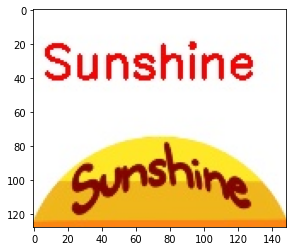

In [48]:
# Visualize the results
import matplotlib.pyplot as plt
predicted_img = mmcv.imread('./outputs/demo_text_recog_pred.jpg')
plt.imshow(mmcv.bgr2rgb(predicted_img))
plt.show()

## Perform Inference with a Pretrained Text Detector 

Next, we perform inference with a pretrained TextSnake text detector and visualize the bounding box results for the demo text detection image provided in [demo_text_det.jpg](https://raw.githubusercontent.com/open-mmlab/mmocr/main/demo/demo_text_det.jpg).

In [109]:
from mmocr.utils.ocr import MMOCR
mmocr = MMOCR(det='FCE_IC15', recog=None)
_ = mmocr.readtext('demo/yue/bend.PNG', print_result=True, output='outputs/demo_text_det_pred.jpg')

load checkpoint from http path: https://download.openmmlab.com/mmocr/textdet/fcenet/fcenet_r50_fpn_1500e_icdar2015_20211022-daefb6ed.pth


/usr/local/lib/python3.7/dist-packages/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


{'boundary_result': [[55.679643988609314, 196.6269896030426, 57.558404982089996, 196.6269896030426, 59.43716597557068, 196.6269896030426, 61.48672342300415, 196.45615816116333, 63.70707732439041, 196.6269896030426, 65.75663477182388, 196.79782104492188, 67.63539576530457, 197.3103153705597, 69.00176739692688, 198.16447257995605, 69.85574966669083, 199.1894612312317, 70.1973425745964, 200.55611276626587, 70.02654612064362, 202.2644271850586, 69.85574966669083, 204.1435730457306, 69.68495321273804, 206.36438179016113, 69.68495321273804, 208.4143590927124, 69.85574966669083, 210.63516783714294, 70.02654612064362, 212.51431369781494, 70.02654612064362, 214.22262811660767, 69.68495321273804, 215.41844820976257, 68.83097094297409, 216.27260541915894, 67.46459931135178, 216.78509974479675, 65.75663477182388, 216.78509974479675, 63.70707732439041, 216.61426830291748, 61.48672342300415, 216.4434368610382, 59.43716597557068, 216.27260541915894, 57.558404982089996, 215.9309425354004, 55.679643988

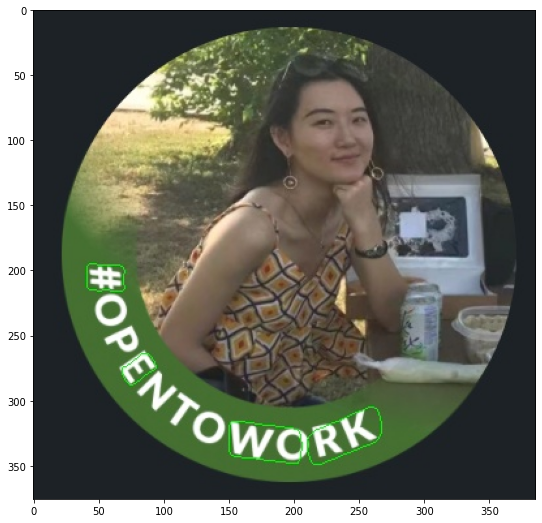

In [110]:
# Visualize the results
import matplotlib.pyplot as plt
predicted_img = mmcv.imread('./outputs/demo_text_det_pred.jpg')
plt.figure(figsize=(9, 11))
plt.imshow(mmcv.bgr2rgb(predicted_img))
plt.show()

## Perform end-to-end OCR with pretrained recognizer and detector

With the help of `ocr.py`, we can easily combine any text detector and recognizer into a pipeline that forms a standard OCR step. Now we build our own OCR pipeline with TextSnake and SAR and apply it to [demo_text_ocr.jpg](https://raw.githubusercontent.com/open-mmlab/mmocr/main/demo/demo_text_ocr.jpg).

In [127]:
from mmocr.utils.ocr import MMOCR
mmocr = MMOCR(det='PANet_IC15', recog='SAR')
mmocr.readtext('demo/yue/car-simple.jpg', print_result=True, output='outputs/demo_text_ocr_pred.jpg')

load checkpoint from http path: https://download.openmmlab.com/mmocr/textdet/panet/panet_r18_fpem_ffm_sbn_600e_icdar2015_20210219-42dbe46a.pth
load checkpoint from http path: https://download.openmmlab.com/mmocr/textrecog/sar/sar_r31_parallel_decoder_academic-dba3a4a3.pth


/mmocr/mmocr/apis/inference.py:50: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '
/usr/local/lib/python3.7/dist-packages/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


{'filename': 'car-simple', 'text': ['250', 'GLA', 'almatic', 'sn66', 'XMZ']}



[{'filename': 'car-simple', 'text': ['250', 'GLA', 'almatic', 'sn66', 'XMZ']}]

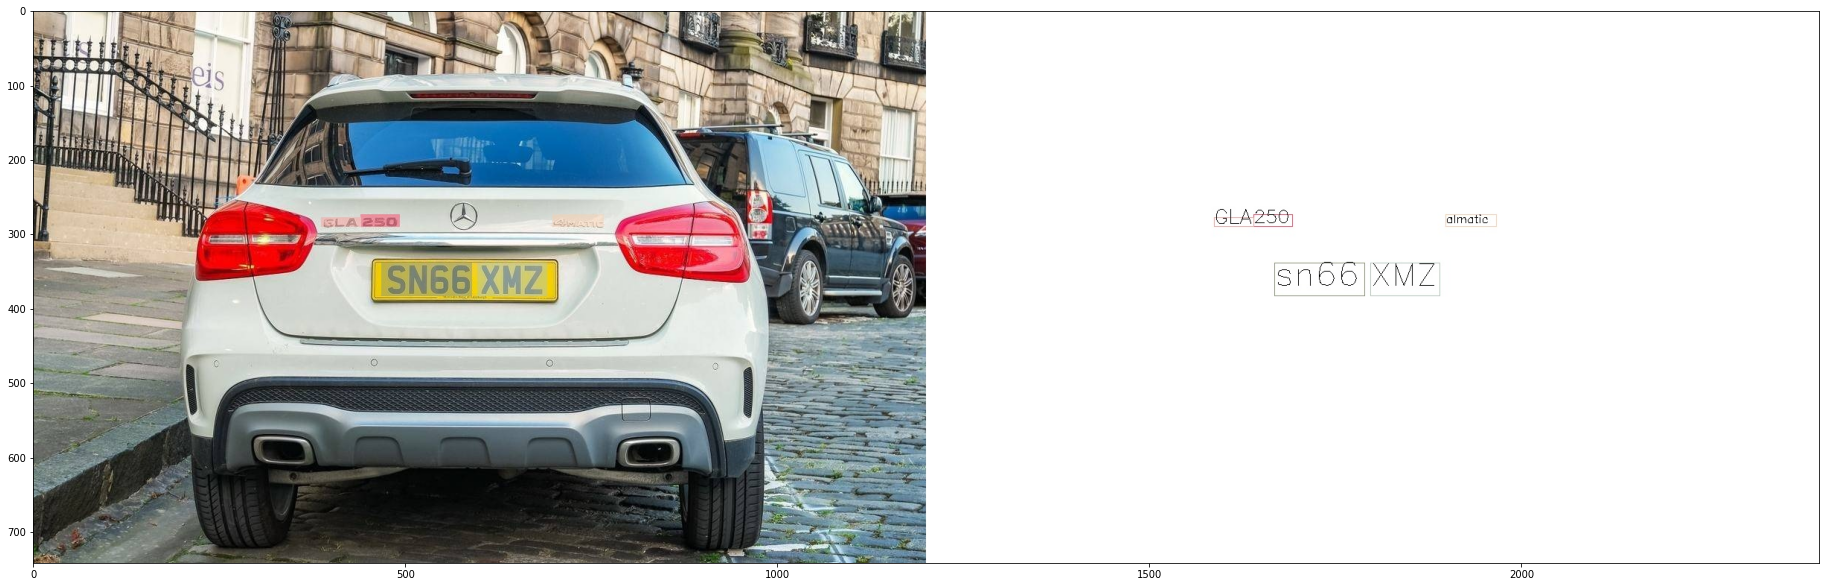

In [128]:
# Visualize the results
import matplotlib.pyplot as plt
predicted_img = mmcv.imread('./outputs/demo_text_ocr_pred.jpg')
plt.figure(figsize=(32, 64))
plt.imshow(mmcv.bgr2rgb(predicted_img))
plt.show()

## Combine OCR with Downstream Tasks

MMOCR also supports downstream tasks of OCR, such as key information extraction (KIE). We can even add a KIE model, SDMG-R, to the pipeline applied to [demo_kie.jpeg](https://raw.githubusercontent.com/open-mmlab/mmocr/main/demo/demo_kie.jpeg) and visualize its prediction based on the OCR result.


In [ ]:
# SDMGR relies on the dictionary provided in wildreceipt
# First download the KIE dataset .tar file and extract it to ./data
!mkdir data
!wget https://download.openmmlab.com/mmocr/data/wildreceipt.tar
!tar -xf wildreceipt.tar 
!mv wildreceipt ./data

--2022-01-30 06:07:57--  https://download.openmmlab.com/mmocr/data/wildreceipt.tar
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.28
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 185323520 (177M) [application/x-tar]
Saving to: ‘wildreceipt.tar’

wildreceipt.tar     100%[===================>] 176.74M  8.59MB/s    in 22s     

2022-01-30 06:08:20 (7.95 MB/s) - ‘wildreceipt.tar’ saved [185323520/185323520]



In [ ]:
from mmocr.utils.ocr import MMOCR
mmocr = MMOCR(det='TextSnake', recog='SAR', kie='SDMGR')
mmocr.readtext('demo/demo_kie.jpeg', print_result=True, output='outputs/demo_kie_pred.jpg')

load checkpoint from http path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_r50_fpn_unet_1200e_ctw1500-27f65b64.pth
load checkpoint from http path: https://download.openmmlab.com/mmocr/textrecog/sar/sar_r31_parallel_decoder_academic-dba3a4a3.pth


/mmocr/mmocr/apis/inference.py:50: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '


load checkpoint from http path: https://download.openmmlab.com/mmocr/kie/sdmgr/sdmgr_unet16_60e_wildreceipt_20210520-7489e6de.pth


/usr/local/lib/python3.7/dist-packages/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/mmocr/mmocr/datasets/kie_dataset.py:46: UserWarning: KIEDataset is only initialized as a downstream demo task of text detection and recognition without an annotation file.
  'without an annotation file.', UserWarning)


{'filename': 'demo_kie', 'text': ['Appraval:052723', 'Acct:Xexexxx8425', '128.27', 'Master', '128.27', 'Total', 'Tax', '11.02', '117.25', 'subTotal', 'Cheese', '10.47', '3.Perreroni', '11.07', '3Supreme', '11.97', '26', '43.94', '0.00', '12.Crunchy.Taco', '10.00', 'SLACOMPARTY', '0.00', '12SFTTACO', '10.00', 'SFtt.Tac.Party.', '0.00', 'MONODELONS', '0.00', '10.Bean', 'Grande', '9.90', 'Beatean', '0.00', 'grande', '9.90', '0rder-113533', 'Cashier:.Eric', '7/30/2012', '8:27:32', '=Article-I.D.:']}



[{'filename': 'demo_kie',
  'text': ['Appraval:052723',
   'Acct:Xexexxx8425',
   '128.27',
   'Master',
   '128.27',
   'Total',
   'Tax',
   '11.02',
   '117.25',
   'subTotal',
   'Cheese',
   '10.47',
   '3.Perreroni',
   '11.07',
   '3Supreme',
   '11.97',
   '26',
   '43.94',
   '0.00',
   '12.Crunchy.Taco',
   '10.00',
   'SLACOMPARTY',
   '0.00',
   '12SFTTACO',
   '10.00',
   'SFtt.Tac.Party.',
   '0.00',
   'MONODELONS',
   '0.00',
   '10.Bean',
   'Grande',
   '9.90',
   'Beatean',
   '0.00',
   'grande',
   '9.90',
   '0rder-113533',
   'Cashier:.Eric',
   '7/30/2012',
   '8:27:32',
   '=Article-I.D.:']}]

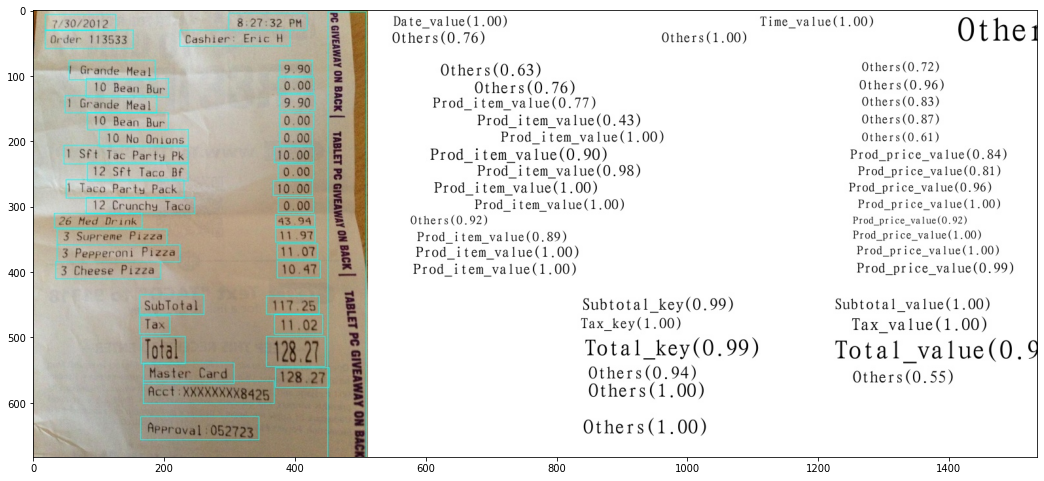

In [ ]:
# Visualize the results
import matplotlib.pyplot as plt
predicted_img = mmcv.imread('./outputs/demo_kie_pred.jpg')
plt.figure(figsize=(18, 32))
plt.imshow(mmcv.bgr2rgb(predicted_img))
plt.show()

## Perform Testing with a Pretrained KIE Model

We perform testing on the WildReceipt dataset for KIE model by first downloading the .tar file from [Datasets Preparation](https://mmocr.readthedocs.io/en/latest/datasets.html) in MMOCR documentation and then extract the dataset. We have chosen the Visual + Textual moduality test dataset, which we evaluate with Macro F1 metrics.

In [ ]:
# Can skip this step if you have downloaded wildreceipt in the last section
# Download the KIE dataset .tar file and extract it to ./data
!mkdir data
!wget https://download.openmmlab.com/mmocr/data/wildreceipt.tar
!tar -xf wildreceipt.tar 
!mv wildreceipt ./data

--2021-05-17 11:39:10--  https://download.openmmlab.com/mmocr/data/wildreceipt.tar
Resolving download.openmmlab.com (download.openmmlab.com)... 47.75.20.25
Connecting to download.openmmlab.com (download.openmmlab.com)|47.75.20.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 185323520 (177M) [application/x-tar]
Saving to: ‘wildreceipt.tar.3’

wildreceipt.tar.3   100%[===================>] 176.74M  17.7MB/s    in 10s     

2021-05-17 11:39:21 (17.1 MB/s) - ‘wildreceipt.tar.3’ saved [185323520/185323520]



In [ ]:
# Test the dataset with macro f1 metrics 
!python tools/test.py configs/kie/sdmgr/sdmgr_unet16_60e_wildreceipt.py https://download.openmmlab.com/mmocr/kie/sdmgr/sdmgr_unet16_60e_wildreceipt_20210405-16a47642.pth --eval macro_f1

Use load_from_http loader
Downloading: "https://download.openmmlab.com/mmocr/kie/sdmgr/sdmgr_unet16_60e_wildreceipt_20210405-16a47642.pth" to /root/.cache/torch/hub/checkpoints/sdmgr_unet16_60e_wildreceipt_20210405-16a47642.pth
100% 18.4M/18.4M [00:01<00:00, 10.2MB/s]
[>>] 472/472, 21.1 task/s, elapsed: 22s, ETA:     0s{'macro_f1': 0.87641114}


## Perform Training on a Toy Dataset with MMOCR Recognizer
We now demonstrate how to perform training with an MMOCR recognizer. Since training a full academic dataset is time consuming (usually takes about several hours), we will train on the toy dataset for the SAR text recognition model and visualize the predictions. Text detection and other downstream tasks such as KIE follow similar procedures.

Training a dataset usually consists of the following steps:
1. Convert the dataset into a format supported by MMOCR (e.g. COCO for text detection). The annotation file can be in either .txt or .lmdb format, depending on the size of the dataset. This step is usually applicable to customized datasets, since the datasets and annotation files we provide are already in supported formats. 
2. Modify the config for training. 
3. Train the model. 

The toy dataset consisits of ten images as well as annotation files in both txt and lmdb format, which can be found in [ocr_toy_dataset](https://github.com/open-mmlab/mmocr/tree/main/tests/data/toy_dataset). 

### Visualize the Toy Dataset

We first get a sense of what the toy dataset looks like by visualizing one of the images and labels. 

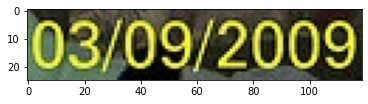

In [129]:
import mmcv
import matplotlib.pyplot as plt 

img = mmcv.imread('./tests/data/ocr_toy_dataset/imgs/1036169.jpg')
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [130]:
# Inspect the labels of the annootation file
!cat tests/data/ocr_toy_dataset/label.txt

1223731.jpg GRAND
1223733.jpg HOTEL
1223732.jpg HOTEL
1223729.jpg PACIFIC
1036169.jpg 03/09/2009
1190237.jpg ANING
1058891.jpg Virgin
1058892.jpg america
1240078.jpg ATTACK
1210236.jpg DAVIDSON


### Modify the Configuration File

In order to perform inference for SAR on colab, we need to modify the config file to accommodate some of the settings of colab such as the number of GPU available. 

In [153]:
from mmcv import Config
cfg = Config.fromfile('./configs/textrecog/sar/sar_r31_parallel_decoder_toy_dataset.py')

In [162]:
import pprint
# pprint.pprint(cfg.img_prefix )
# pprint.pprint(dict(cfg))
# pprint.pprint(cfg.work_dir)
print(cfg.pretty_text)

checkpoint_config = dict(interval=1)
log_config = dict(interval=5, hooks=[dict(type='TextLoggerHook')])
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = None
resume_from = None
workflow = [('train', 1)]
opencv_num_threads = 0
mp_start_method = 'fork'
label_convertor = dict(
    type='AttnConvertor', dict_type='DICT90', with_unknown=True)
model = dict(
    type='SARNet',
    backbone=dict(type='ResNet31OCR'),
    encoder=dict(
        type='SAREncoder', enc_bi_rnn=False, enc_do_rnn=0.1, enc_gru=False),
    decoder=dict(
        type='ParallelSARDecoder',
        enc_bi_rnn=False,
        dec_bi_rnn=False,
        dec_do_rnn=0,
        dec_gru=False,
        pred_dropout=0.1,
        d_k=512,
        pred_concat=True),
    loss=dict(type='SARLoss'),
    label_convertor=dict(
        type='AttnConvertor', dict_type='DICT90', with_unknown=True),
    max_seq_len=30)
optimizer = dict(type='Adam', lr=0.001)
optimizer_config = dict(grad_clip=None)
lr_config = dict(policy='step

In [135]:
!cat ./configs/textrecog/sar/sar_r31_parallel_decoder_toy_dataset.py

_base_ = [
    '../../_base_/default_runtime.py', '../../_base_/recog_models/sar.py',
    '../../_base_/schedules/schedule_adam_step_5e.py',
    '../../_base_/recog_pipelines/sar_pipeline.py',
    '../../_base_/recog_datasets/toy_data.py'
]

train_list = {{_base_.train_list}}
test_list = {{_base_.test_list}}

train_pipeline = {{_base_.train_pipeline}}
test_pipeline = {{_base_.test_pipeline}}

data = dict(
    workers_per_gpu=2,
    samples_per_gpu=8,
    train=dict(
        type='UniformConcatDataset',
        datasets=train_list,
        pipeline=train_pipeline),
    val=dict(
        type='UniformConcatDataset',
        datasets=test_list,
        pipeline=test_pipeline),
    test=dict(
        type='UniformConcatDataset',
        datasets=test_list,
        pipeline=test_pipeline))

evaluation = dict(interval=1, metric='acc')


In [159]:
!ls ./demo/tutorial_exps

epoch_1.pth  epoch_3.pth  epoch_5.pth  None.log.json
epoch_2.pth  epoch_4.pth  latest.pth


In [163]:
!cat ./demo/tutorial_exps/None.log.json

{"mode": "train", "epoch": 1, "iter": 40, "lr": 0.00013, "memory": 4196, "data_time": 0.05325, "loss_ce": 3.10613, "loss": 3.10613, "time": 0.17247}
{"mode": "train", "epoch": 1, "iter": 80, "lr": 0.00013, "memory": 4196, "data_time": 0.00153, "loss_ce": 1.81735, "loss": 1.81735, "time": 0.12001}
{"mode": "train", "epoch": 1, "iter": 120, "lr": 0.00013, "memory": 4196, "data_time": 0.00147, "loss_ce": 1.20406, "loss": 1.20406, "time": 0.11999}
{"mode": "train", "epoch": 1, "iter": 160, "lr": 0.00013, "memory": 4196, "data_time": 0.00146, "loss_ce": 0.88308, "loss": 0.88308, "time": 0.11983}
{"mode": "train", "epoch": 1, "iter": 200, "lr": 0.00013, "memory": 4196, "data_time": 0.00155, "loss_ce": 0.74437, "loss": 0.74437, "time": 0.12005}
{"mode": "train", "epoch": 1, "iter": 240, "lr": 0.00013, "memory": 4196, "data_time": 0.00152, "loss_ce": 0.52257, "loss": 0.52257, "time": 0.12024}
{"mode": "val", "epoch": 1, "iter": 2, "lr": 0.00013, "0_word_acc": 0.9, "0_word_acc_ignore_case": 0.9

In [139]:
from mmdet.apis import set_random_seed

# Set up working dir to save files and logs.
cfg.work_dir = './demo/tutorial_exps'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.001 / 8
cfg.lr_config.warmup = None
# Choose to log training results every 40 images to reduce the size of log file. 
cfg.log_config.interval = 40

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
checkpoint_config = dict(interval=1)
log_config = dict(interval=40, hooks=[dict(type='TextLoggerHook')])
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = None
resume_from = None
workflow = [('train', 1)]
opencv_num_threads = 0
mp_start_method = 'fork'
label_convertor = dict(
    type='AttnConvertor', dict_type='DICT90', with_unknown=True)
model = dict(
    type='SARNet',
    backbone=dict(type='ResNet31OCR'),
    encoder=dict(
        type='SAREncoder', enc_bi_rnn=False, enc_do_rnn=0.1, enc_gru=False),
    decoder=dict(
        type='ParallelSARDecoder',
        enc_bi_rnn=False,
        dec_bi_rnn=False,
        dec_do_rnn=0,
        dec_gru=False,
        pred_dropout=0.1,
        d_k=512,
        pred_concat=True),
    loss=dict(type='SARLoss'),
    label_convertor=dict(
        type='AttnConvertor', dict_type='DICT90', with_unknown=True),
    max_seq_len=30)
optimizer = dict(type='Adam', lr=0.000125)
optimizer_config = dict(grad_clip=None)
lr_config = dict(

### Train the SAR Text Recognizer 
Finally, we train the SAR text recognizer on the toy dataset for five epochs. 

In [140]:
from mmocr.datasets import build_dataset
from mmocr.models import build_detector
from mmocr.apis import train_detector
import os.path as osp

# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(
    cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

/mmocr/mmocr/apis/train.py:86: UserWarning: config is now expected to have a `runner` section, please set `runner` in your config.
  'please set `runner` in your config.', UserWarning)
/mmocr/mmocr/apis/utils.py:53: UserWarning: Remove "MultiRotateAugOCR" to support batch inference since samples_per_gpu > 1.
  warnings.warn(warning_msg)
2022-01-31 01:51:43,980 - mmocr - INFO - Start running, host: root@f3cb42741bd0, work_dir: /mmocr/demo/tutorial_exps
2022-01-31 01:51:43,981 - mmocr - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) CheckpointHook                     
(NORMAL      ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) EvalHook                           
(LOW         ) IterTimerHook                      
(VERY_LOW    ) TextLoggerHook               

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 10/10, 17.1 task/s, elapsed: 1s, ETA:     0s

2022-01-31 01:52:20,079 - mmocr - INFO - 
Evaluateing tests/data/ocr_toy_dataset/label.lmdb with 10 images now
2022-01-31 01:52:20,086 - mmocr - INFO - Epoch(val) [1][2]	0_word_acc: 0.9000, 0_word_acc_ignore_case: 0.9000, 0_word_acc_ignore_case_symbol: 0.9000, 0_char_recall: 0.8871, 0_char_precision: 0.9167, 0_1-N.E.D: 0.9000
2022-01-31 01:52:26,996 - mmocr - INFO - Epoch [2][40/250]	lr: 1.250e-04, eta: 0:02:05, time: 0.172, data_time: 0.053, memory: 4196, loss_ce: 0.4276, loss: 0.4276
2022-01-31 01:52:31,798 - mmocr - INFO - Epoch [2][80/250]	lr: 1.250e-04, eta: 0:01:58, time: 0.120, data_time: 0.002, memory: 4196, loss_ce: 0.3188, loss: 0.3188
2022-01-31 01:52:36,599 - mmocr - INFO - Epoch [2][120/250]	lr: 1.250e-04, eta: 0:01:52, time: 0.120, data_time: 0.002, memory: 4196, loss_ce: 0.3161, loss: 0.3161
2022-01-31 01:52:41,400 - mmocr - INFO - Epoch [2][160/250]	lr: 1.250e-04, eta: 0:01:46, time: 0.120, data_time: 0.002, memory: 4196, loss_ce: 0.2782, loss: 0.2782
2022-01-31 01:52:4

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 10/10, 17.3 task/s, elapsed: 1s, ETA:     0s

2022-01-31 01:52:55,812 - mmocr - INFO - 
Evaluateing tests/data/ocr_toy_dataset/label.lmdb with 10 images now
2022-01-31 01:52:55,816 - mmocr - INFO - Epoch(val) [2][2]	0_word_acc: 1.0000, 0_word_acc_ignore_case: 1.0000, 0_word_acc_ignore_case_symbol: 1.0000, 0_char_recall: 1.0000, 0_char_precision: 1.0000, 0_1-N.E.D: 1.0000
2022-01-31 01:53:02,732 - mmocr - INFO - Epoch [3][40/250]	lr: 1.250e-04, eta: 0:01:30, time: 0.172, data_time: 0.054, memory: 4196, loss_ce: 0.2568, loss: 0.2568
2022-01-31 01:53:07,525 - mmocr - INFO - Epoch [3][80/250]	lr: 1.250e-04, eta: 0:01:24, time: 0.120, data_time: 0.001, memory: 4196, loss_ce: 0.2576, loss: 0.2576
2022-01-31 01:53:12,321 - mmocr - INFO - Epoch [3][120/250]	lr: 1.250e-04, eta: 0:01:19, time: 0.120, data_time: 0.001, memory: 4196, loss_ce: 0.2365, loss: 0.2365
2022-01-31 01:53:17,117 - mmocr - INFO - Epoch [3][160/250]	lr: 1.250e-04, eta: 0:01:14, time: 0.120, data_time: 0.001, memory: 4196, loss_ce: 0.2538, loss: 0.2538
2022-01-31 01:53:2

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 10/10, 16.8 task/s, elapsed: 1s, ETA:     0s

2022-01-31 01:53:31,988 - mmocr - INFO - 
Evaluateing tests/data/ocr_toy_dataset/label.lmdb with 10 images now
2022-01-31 01:53:31,991 - mmocr - INFO - Epoch(val) [3][2]	0_word_acc: 1.0000, 0_word_acc_ignore_case: 1.0000, 0_word_acc_ignore_case_symbol: 1.0000, 0_char_recall: 1.0000, 0_char_precision: 1.0000, 0_1-N.E.D: 1.0000
2022-01-31 01:53:38,896 - mmocr - INFO - Epoch [4][40/250]	lr: 1.250e-05, eta: 0:00:57, time: 0.172, data_time: 0.053, memory: 4196, loss_ce: 0.2432, loss: 0.2432
2022-01-31 01:53:43,730 - mmocr - INFO - Epoch [4][80/250]	lr: 1.250e-05, eta: 0:00:52, time: 0.121, data_time: 0.002, memory: 4196, loss_ce: 0.2260, loss: 0.2260
2022-01-31 01:53:48,528 - mmocr - INFO - Epoch [4][120/250]	lr: 1.250e-05, eta: 0:00:47, time: 0.120, data_time: 0.002, memory: 4196, loss_ce: 0.2356, loss: 0.2356
2022-01-31 01:53:53,321 - mmocr - INFO - Epoch [4][160/250]	lr: 1.250e-05, eta: 0:00:42, time: 0.120, data_time: 0.002, memory: 4196, loss_ce: 0.2529, loss: 0.2529
2022-01-31 01:53:5

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 10/10, 17.2 task/s, elapsed: 1s, ETA:     0s

2022-01-31 01:54:07,786 - mmocr - INFO - 
Evaluateing tests/data/ocr_toy_dataset/label.lmdb with 10 images now
2022-01-31 01:54:07,789 - mmocr - INFO - Epoch(val) [4][2]	0_word_acc: 1.0000, 0_word_acc_ignore_case: 1.0000, 0_word_acc_ignore_case_symbol: 1.0000, 0_char_recall: 1.0000, 0_char_precision: 1.0000, 0_1-N.E.D: 1.0000
2022-01-31 01:54:14,700 - mmocr - INFO - Epoch [5][40/250]	lr: 1.250e-06, eta: 0:00:26, time: 0.172, data_time: 0.053, memory: 4196, loss_ce: 0.2457, loss: 0.2457
2022-01-31 01:54:19,504 - mmocr - INFO - Epoch [5][80/250]	lr: 1.250e-06, eta: 0:00:21, time: 0.120, data_time: 0.001, memory: 4196, loss_ce: 0.2178, loss: 0.2178
2022-01-31 01:54:24,308 - mmocr - INFO - Epoch [5][120/250]	lr: 1.250e-06, eta: 0:00:16, time: 0.120, data_time: 0.001, memory: 4196, loss_ce: 0.2378, loss: 0.2378
2022-01-31 01:54:29,117 - mmocr - INFO - Epoch [5][160/250]	lr: 1.250e-06, eta: 0:00:11, time: 0.120, data_time: 0.002, memory: 4196, loss_ce: 0.2249, loss: 0.2249
2022-01-31 01:54:3

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 10/10, 17.0 task/s, elapsed: 1s, ETA:     0s

2022-01-31 01:54:43,731 - mmocr - INFO - 
Evaluateing tests/data/ocr_toy_dataset/label.lmdb with 10 images now
2022-01-31 01:54:43,734 - mmocr - INFO - Epoch(val) [5][2]	0_word_acc: 1.0000, 0_word_acc_ignore_case: 1.0000, 0_word_acc_ignore_case_symbol: 1.0000, 0_char_recall: 1.0000, 0_char_precision: 1.0000, 0_1-N.E.D: 1.0000


### Test and Visualize the Predictions

For completeness, we also perform testing on the latest checkpoint and evaluate the results with hmean-iou metrics. The predictions are saved in the ./outputs file. 

In [141]:
from mmocr.apis import init_detector, model_inference

img = './tests/data/ocr_toy_dataset/imgs/1036169.jpg'
checkpoint = "./demo/tutorial_exps/epoch_5.pth"
out_file = 'outputs/1036169.jpg'

model = init_detector(cfg, checkpoint, device="cuda:0")
if model.cfg.data.test['type'] == 'ConcatDataset':
    model.cfg.data.test.pipeline = model.cfg.data.test['datasets'][0].pipeline


result = model_inference(model, img)
print(f'result: {result}')

img = model.show_result(
        img, result, out_file=out_file, show=False)

mmcv.imwrite(img, out_file)

load checkpoint from local path: ./demo/tutorial_exps/epoch_5.pth
result: {'text': '03/09/2009', 'score': 0.9994902014732361}


True

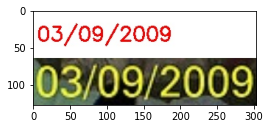

In [142]:
# Visualize the results
predicted_img = mmcv.imread('./outputs/1036169.jpg')
plt.figure(figsize=(4, 4))
plt.imshow(mmcv.bgr2rgb(predicted_img))
plt.show()